In [1]:
import pandas as pd

In [45]:
hour1 = pd.read_csv('hourly.csv')

In [46]:
hour = hour1.head(5000)

In [47]:
hour.shape

(5000, 17)

In [55]:
hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [48]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

In [73]:
Season = pd.DataFrame(hour, columns = ['season'])
Hour = pd.DataFrame(hour, columns = ['hr'])
Working = pd.DataFrame(hour, columns = ['workingday'])
Temp = pd.DataFrame(hour, columns = ['temp'])
Hour = pd.DataFrame(hour, columns = ['hr'])
HoliD = pd.DataFrame(hour, columns = ['holiday'])
Count = pd.DataFrame(hour, columns = ['cnt'])
Reg = pd.DataFrame(hour, columns = ['registered'])
Casual = pd.DataFrame(hour, columns = ['casual'])
Humidity = pd.DataFrame(hour, columns = ['hum'])
Atemp = pd.DataFrame(hour, columns = ['atemp'])
WeekD = pd.DataFrame(hour, columns = ['weekday'])
Wind = pd.DataFrame(hour, columns = ['windspeed'])

In [74]:
le = preprocessing.LabelEncoder()
Season=le.fit_transform(Season)
Hour =le.fit_transform(Hour)
WeekD =le.fit_transform(WeekD)
Atemp =le.fit_transform(Atemp)
Humidity =le.fit_transform(Humidity)
Casual =le.fit_transform(Casual)
Reg =le.fit_transform(Reg)
Count =le.fit_transform(Count)
HoliD =le.fit_transform(HoliD)
Temp =le.fit_transform(Temp)
Working =le.fit_transform(Working)
Wind =le.fit_transform(Wind)

C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
Y = list(zip(Count))

In [76]:
X = list(zip(Hour,Wind,Temp,Reg,Casual,Humidity,Atemp))

In [91]:
X = hour[hour.columns[2:16]] 
Y = hour.iloc[:,-1]

[0.01621445 0.         0.0486978  0.11438026 0.00369763 0.0667707
 0.01108959 0.03805326 0.09536404 0.09723342 0.1054902  0.10861242
 0.12641497 0.16798126]


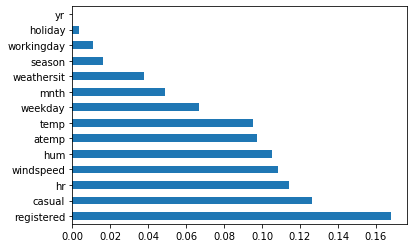

season        0.016214
yr            0.000000
mnth          0.048698
hr            0.114380
holiday       0.003698
weekday       0.066771
workingday    0.011090
weathersit    0.038053
temp          0.095364
atemp         0.097233
hum           0.105490
windspeed     0.108612
casual        0.126415
registered    0.167981
dtype: float64


In [67]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_)
feat_importance = pd.Series(model.feature_importances_, index = X.columns)
feat_importance.nlargest(20).plot(kind = 'barh')

plt.show()
print(feat_importance)

In [68]:
fi1 = feat_importance.astype(str)

In [69]:
f12 = feat_importance.to_frame()

In [70]:
f13 = f12.sort_values(by = 0, axis = 0, ascending = False)

In [71]:
f13

,0
registered,0.167981
casual,0.126415
hr,0.114380
windspeed,0.108612
hum,0.105490
atemp,0.097233
temp,0.095364
weekday,0.066771
mnth,0.048698
weathersit,0.038053


In [5]:
hour.shape

(17379, 17)

In [6]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [113]:
#X = hour['hum','windspeed'].values
#y = hour['cnt'].values.reshape(-1,1)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Lin Reg

In [256]:
hour2 = pd.DataFrame(hour1, columns=["windspeed","hr","hum","atemp",'temp'])
hour3 = pd.DataFrame(hour1, columns=["cnt"])

In [257]:
X = hour2
Y = hour3

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [259]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

In [260]:
predictions = lm.predict(X)

In [261]:
lm.score(X,Y)

0.3263360902647965

In [262]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [263]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[54.01520721]
[[  15.64791569    7.47184433 -201.76217715  248.83480626  108.06713419]]


In [264]:
y_pred = regressor.predict(X_test)

In [265]:
y_pred

array([[109.80197418],
       [ 63.23942154],
       [252.07060707],
       ...,
       [122.4021353 ],
       [ 47.66296828],
       [190.55667953]])

In [266]:
regressor.score(X_train,y_train)

0.3223240493565379

In [267]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

AttributeError: 'DataFrame' object has no attribute 'flatten'

### Gaussian NB

In [268]:
from sklearn.naive_bayes import GaussianNB
model2 = GaussianNB()

model2.fit(X,Y)

yprediction2 = model2.predict(X)

C:\Users\Pranav\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [269]:
print("Accuracy:",round(metrics.accuracy_score(Y, yprediction2),2))

Accuracy: 0.03


### Deep

In [308]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

In [425]:
d1 = pd.read_csv('hourly.csv')

In [426]:
X1 = pd.DataFrame(d1, columns=["windspeed","hr","hum","atemp",'temp'])
Y1 = pd.DataFrame(d1, columns=["cnt"])

In [443]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)

In [428]:
print('Dimension of Train IP:', X_train.shape)
print('Dimension of Test IP:', X_test.shape)
print('Dimension of Train Target :', Y_train.shape)
print('Dimension of Test Target :', Y_test.shape)

Dimension of Train IP: (12165, 5)
Dimension of Test IP: (5214, 5)
Dimension of Train Target : (12165, 1)
Dimension of Test Target : (5214, 1)


In [429]:
Y_train = keras.utils.to_categorical(Y_train, 9)
Y_test = keras.utils.to_categorical(Y_test, 9)
print('Dimension of Train Target :', Y_train.shape)
print('Dimension of Test Target :', Y_test.shape)

IndexError: index 9 is out of bounds for axis 1 with size 9

In [322]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_dim = 5)) #512 number of neurons in first and second hidden layers
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

In [323]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'RMSprop',metrics = ['accuracy'])

In [324]:
model.fit(X_train, Y_train, batch_size = 256, epochs =7, validation_split = 1/6, verbose = 1) 

ValueError: Error when checking target: expected dense_15 to have 2 dimensions, but got array with shape (12165, 977, 5)

In [87]:
#df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df

In [88]:
#df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
#df

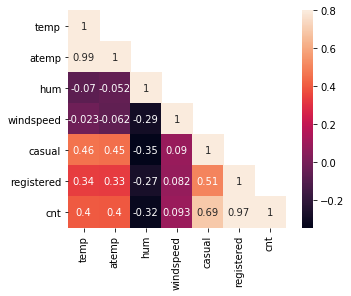

In [17]:
corrMatt = hour[['temp',
                    'atemp', 
                    'hum', 
                    'windspeed', 
                    'casual', 
                    'registered', 
                    'cnt']].corr()

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
sns.heatmap(corrMatt, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)

## Random Forest

In [415]:
features = pd.read_csv('hourly.csv')

In [416]:
#features = pd.DataFrame(features1, columns = ["windspeed","hr","hum","atemp",'temp','cnt'])

In [417]:
del features['registered']
del features['casual']
del features['instant']
del features['dteday']

In [418]:
features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
features.head(5)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [419]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['cnt'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('cnt', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [420]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 0)

In [421]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (13034, 12)
Training Labels Shape: (13034,)
Testing Features Shape: (4345, 12)
Testing Labels Shape: (4345,)


In [422]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 60, random_state = 0)
# Train the model on training data
rf.fit(train_features, train_labels);

In [423]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 26.4 degrees.


In [424]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 66.75 %.


### Deep 2

In [430]:
train_df = pd.read_csv('hourly.csv')

In [445]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(tX, train_df['cnt'], test_size=0.3, random_state=42)

In [437]:
#create a dataframe with all training data except the target column
tX = train_df.drop(columns=['cnt','dteday'])

#check that the target variable has been removed
tX.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


In [438]:
#create a dataframe with only the target column
train_y = train_df[['cnt']]

#view dataframe
train_y.head()

,cnt
0,16
1,40
2,32
3,13
4,1


In [446]:
from keras.models import Sequential
from keras.layers import Dense
#create model
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [454]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [456]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
mcp_save = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='accuracy', mode='max')
#train model
model.fit(X_train, Y_train, validation_split=0.2, epochs=30, verbose=0,callbacks=[mcp_save])

In [459]:
model.evaluate(X_train,Y_train)

12165/12165 [==============================] - 0s 11us/step


[101.69804521867194, 0.019975339993834496]

In [457]:
test_y_predictions = model.predict(X_test)

In [458]:
test_y_predictions

array([[437.11545 ],
       [ 97.05393 ],
       [ 11.522437],
       ...,
       [567.5606  ],
       [328.7502  ],
       [ 81.95255 ]], dtype=float32)

In [460]:
raw = pd.read_csv('hourly.csv')

In [461]:
def generate_dummies(df, dummy_column):
    dummies = pd.get_dummies(df[dummy_column], prefix=dummy_column)
    df = pd.concat([df, dummies], axis=1)
    return df

X = pd.DataFrame.copy(raw)
dummy_columns = ["season", "yr", "mnth", "hr", "weekday", "weathersit"]
for dummy_column in dummy_columns:
    X = generate_dummies(X, dummy_column)

In [462]:
for dummy_column in dummy_columns:
    del X[dummy_column]

In [463]:
y = X['cnt']
del X['cnt']
del X['casual']
del X['registered']
del X['instant']
del X['dteday']

In [464]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22, test_size = 0.2)

In [470]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

regressor = RandomForestRegressor()
parameters = [{'n_estimators' : [30,70], 'max_features' : ['auto','sqrt','log2']}]
grid_search = GridSearchCV(estimator = regressor, param_grid = parameters)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [471]:
best_accuracy

0.9155336188815465